In [1]:

#import required python packages
import pandas as pd
import numpy as np
import glob,os
import matplotlib.dates as mdates

#to plot in the notebook
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

#download the data and import into df
import pandas_datareader as pdr
from datetime import datetime
import statsmodels.regression.linear_model as rg
#import arch.unitroot as at

We need to extract various types of Crypto Currencies for this project. The best ones can be found from the source given below various Cryptocurrencies are taken into the dataframes using pandas_datareader.

Source: https://finance.yahoo.com/news/top-10-cryptocurrencies-market-capitalisation-160046487.html

The above article analyses the top 10 cryptocurrencies by market capitalisation.

Beginning with the largest, the top 10 are currently Bitcoin ($BTC), Ethereum ($ETH), XRP ($XRP), Tether ($USDT), Bitcoin Cash ($BCH) , Litecoin ($LTC), EOS ($EOS), Binance Coin ($BNB), Bitcoin SV ($BSV) and Tezos ($XTZ).

Bitcoin (BTC) $128bn

Ethereum (ETH) $19.4bn

XRP (XRP) $8.22bn

Tether (USDT) $6.4bn

Bitcoin Cash (BCH) $4.1bn

Bitcoin SV (BSV) $3.4bn

Litecoin (LTC) $2.6bn

EOS (EOS) $2.4bn

Binance Coin (BNB) $2.4bn

Tezos (XTZ) $1.5bn

In [9]:
## Downloading and assembling the data for the project 

curr = ['BTC-USD','ETH-USD','XRP-USD','BCH-USD','USDT-USD','BSV-USD', 'LTC-USD','EOS-USD','BNB-USD','XTZ-USD']

BTC = pdr.get_data_yahoo(symbols='BTC-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
ETH = pdr.get_data_yahoo(symbols='ETH-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
XRP = pdr.get_data_yahoo(symbols='XRP-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
BCH = pdr.get_data_yahoo(symbols='BCH-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
USDT = pdr.get_data_yahoo(symbols='USDT-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
LTC = pdr.get_data_yahoo(symbols='LTC-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
EOS = pdr.get_data_yahoo(symbols='EOS-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))
BNB = pdr.get_data_yahoo(symbols='BNB-USD', start=datetime(2020, 1, 1), end=datetime(2021, 1, 1))

data= pd.concat([BTC['Adj Close'],ETH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,XRP['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BCH['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,USDT['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,LTC['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,EOS['Adj Close']], ignore_index=True,axis=1)
data= pd.concat([data,BNB['Adj Close']], ignore_index=True,axis=1)


data.columns = [ 'BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

data.head()

,BTC_ADJ,ETH_ADJ,XRP_ADJ,BCH_ADJ,USDT_ADJ,LTC_ADJ,EOS_ADJ,BNB_ADJ
Date,,,,,,,,
2020-01-01,7200.174316,130.802002,0.192667,204.397537,0.999836,42.017719,2.597236,13.689083
2020-01-02,6985.470215,127.410179,0.188043,195.698563,1.001565,39.823013,2.462377,13.027011
2020-01-03,7344.884277,134.171707,0.193521,222.412979,1.004192,42.415573,2.637661,13.660452
2020-01-04,7410.656738,135.069366,0.194355,226.018692,1.007472,43.326607,2.667841,13.891512
2020-01-05,7411.317383,136.276779,0.195537,224.096527,1.006197,43.553207,2.701631,14.111019


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


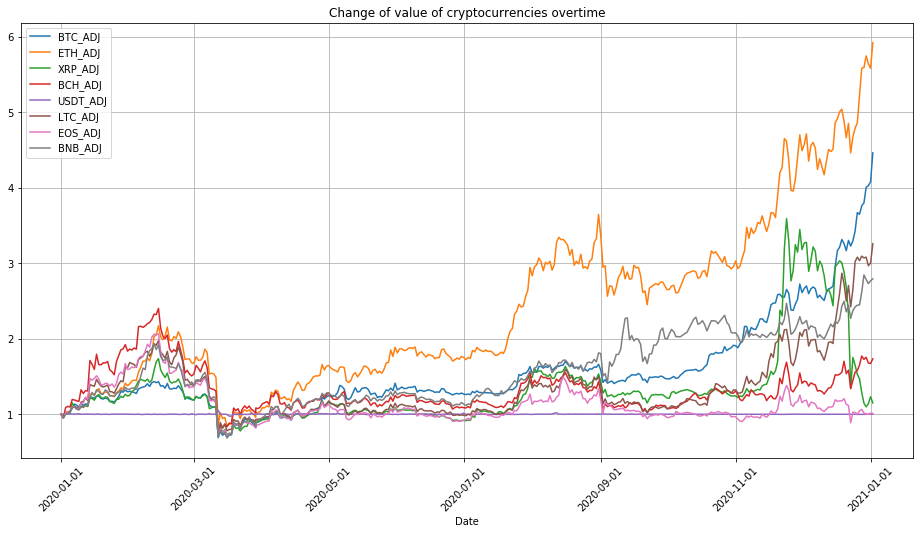

In [10]:
# We need to normalize the values to project them on a visualization plot for better understanding of the datd

prices_norm = data.divide(data.iloc[0]) # divide them with the highest which is BTC

curr = ['BTC_ADJ','ETH_ADJ','XRP_ADJ','BCH_ADJ','USDT_ADJ','LTC_ADJ','EOS_ADJ','BNB_ADJ']

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(prices_norm)
plt.title('Change of value of cryptocurrencies overtime')
plt.legend(curr)
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)

plt.show()

We can observe that some currencies performed well compared to others. Almost all the currencies values fell when the Corona Pandemic started in March in USA. But later in August this year all the currencies values increased drastically.

In [11]:
#Normalizing the dataframe and get percentage change values 
data=pd.DataFrame(data)

def normalize_series(data):
    #take tail to drop head NA
    return data.pct_change(1).dropna()
dt=normalize_series(data)

#remove first row with NAs
dt=dt.tail(len(dt)-1)
dt.columns = [ 'BTC_RET','ETH_RET','XRP_RET','BCH_RET','USDT_RET','LTC_RET','EOS_RET','BNB_RET']
dt['BTC_RET'].head()

Date
2020-01-03    0.051452
2020-01-04    0.008955
2020-01-05    0.000089
2020-01-06    0.048291
2020-01-07    0.050774
Name: BTC_RET, dtype: float64

In [12]:
# Normalizing and setting up cumulative returns in a  datafrme 
def normalize_and_accumulate_series(data):
    #take tail to drop head NA
    return data.pct_change(1).cumsum().dropna()
dt =normalize_and_accumulate_series(data)


#remove first row with NAs
dt = dt.tail(len(dt)-1)
dt.columns = [ 'BTC_C.RET','ETH_C.RET','XRP_C.RET','BCH_C.RET','USDT_C.RET','LTC_C.RET','EOS_C.RET','BNB_C.RET']
dt['BTC_C.RET'].head()

Date
2020-01-03    0.021632
2020-01-04    0.030587
2020-01-05    0.030676
2020-01-06    0.078968
2020-01-07    0.129741
Name: BTC_C.RET, dtype: float64

In [13]:
dt.describe()

,BTC_C.RET,ETH_C.RET,XRP_C.RET,BCH_C.RET,USDT_C.RET,LTC_C.RET,EOS_C.RET,BNB_C.RET
count,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000,362.000000
mean,0.561991,1.056549,0.450195,0.624743,0.005669,0.522633,0.389961,0.679949
std,0.393793,0.571516,0.397526,0.191801,0.004770,0.338841,0.162149,0.387496
min,-0.249160,0.027138,-0.192642,-0.014153,-0.022497,-0.129962,-0.126490,-0.169307
25%,0.273621,0.619210,0.202388,0.517455,0.003915,0.305313,0.298593,0.418150
50%,0.486022,0.933374,0.319876,0.590299,0.006157,0.443052,0.382130,0.546937
75%,0.708861,1.482627,0.542112,0.743306,0.007275,0.643865,0.504295,1.103935
max,1.782668,2.262887,1.679406,1.147628,0.054195,1.679461,0.778795,1.497596


C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


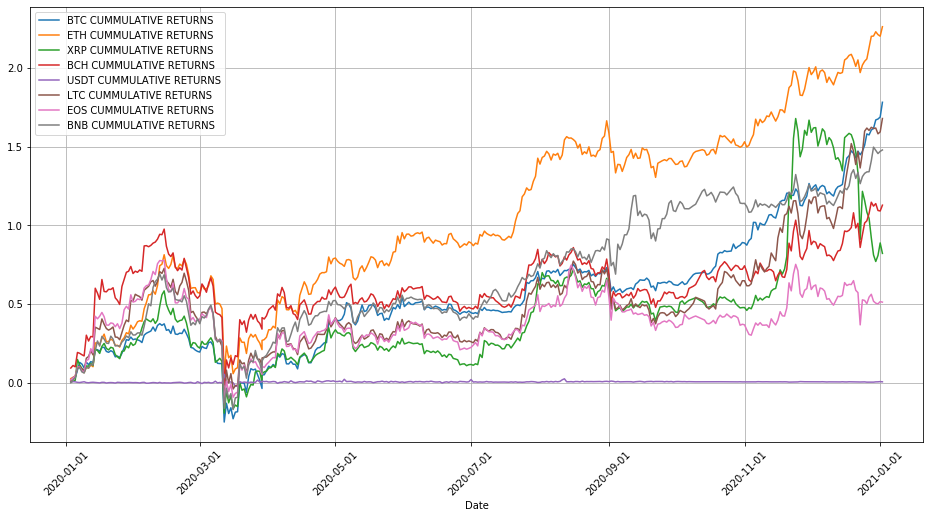

In [14]:
# The Cummulative returns Plot to get the data based on rate of change

plt.figure(figsize=(16,8))
plt.xticks(rotation=45)
ax = plt.axes()
plt.plot(dt['BTC_C.RET'],label='BTC CUMMULATIVE RETURNS')
plt.plot(dt['ETH_C.RET'],label='ETH CUMMULATIVE RETURNS')
plt.plot(dt['XRP_C.RET'],label='XRP CUMMULATIVE RETURNS')
plt.plot(dt['BCH_C.RET'],label='BCH CUMMULATIVE RETURNS')
plt.plot(dt['USDT_C.RET'],label='USDT CUMMULATIVE RETURNS')
plt.plot(dt['LTC_C.RET'],label='LTC CUMMULATIVE RETURNS')
plt.plot(dt['EOS_C.RET'],label='EOS CUMMULATIVE RETURNS')
plt.plot(dt['BNB_C.RET'],label='BNB CUMMULATIVE RETURNS')
plt.xlabel("Date")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.grid(True)
plt.legend(loc='best')
plt.show()

Two main criteria that would determine the desired pair are the correlation value and Cointegration. The pair with the highest correlation, is the desired pair. High positive correlation means that the returns of both currencies are going towards same direction. Conintegration values should be low for a desired value. values less than 0.05 are better.

First we attempted to get the p-value of all possible pair in our selected

In [15]:
#obtaining the P-value for every possible pair within our selected
#for cointegration test 
from statsmodels.tsa.stattools import coint
import scipy

#co- integration test
for p1 in dt.columns:
    
    for p2 in dt.columns:
        
        if p1 != p2:
            test_result = coint(dt[p1], dt[p2])
            print(p1 + ' and ' + p2 + ': p-value = ' + str(test_result[1]))
            #rint(test_result)

BTC_C.RET and ETH_C.RET: p-value = 0.9883286964240984
BTC_C.RET and XRP_C.RET: p-value = 0.3892517057913032
BTC_C.RET and BCH_C.RET: p-value = 0.5441483595551706
BTC_C.RET and USDT_C.RET: p-value = 1.0
BTC_C.RET and LTC_C.RET: p-value = 0.7807160277581912
BTC_C.RET and EOS_C.RET: p-value = 0.9934078566028297
BTC_C.RET and BNB_C.RET: p-value = 0.9598625810303091
ETH_C.RET and BTC_C.RET: p-value = 0.9310876687407525
ETH_C.RET and XRP_C.RET: p-value = 0.3045138135492407
ETH_C.RET and BCH_C.RET: p-value = 0.6492247972770318
ETH_C.RET and USDT_C.RET: p-value = 0.9693277976703262
ETH_C.RET and LTC_C.RET: p-value = 0.8637440172771995
ETH_C.RET and EOS_C.RET: p-value = 0.9524301789800748
ETH_C.RET and BNB_C.RET: p-value = 0.3605292040685395
XRP_C.RET and BTC_C.RET: p-value = 0.0222065889863671
XRP_C.RET and ETH_C.RET: p-value = 0.04209341878198992
XRP_C.RET and BCH_C.RET: p-value = 0.00324711903856309
XRP_C.RET and USDT_C.RET: p-value = 0.5149577900466477
XRP_C.RET and LTC_C.RET: p-value = 0.0